# HEART DISEASE PREDICTION

### Heart Disease Dataset:

Dataset link: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?fbclid=IwAR0tTbT-K7K1p4LiziyAmrnNOiudZSBTmEhrSXpkBgoIEDcCgp-MbOIsFRU

### Details About Dataset:

1)age                                                                                                                       
2)sex                                                                                                                       
3)chest pain type (4 values)                                                                                               
    1)typical angina                                       
    2)atypical angina                                           
    3)non-anginal pain                                                        
    4)asymptomatic                                                           
4)resting blood pressure                                      
5)serum cholestoral in mg/dl                                               
6)fasting blood sugar > 120 mg/dl (1=true;0=false)                                                               
7)resting electrocardiographic results (values 0,1,2) (0=normal,1=abnormal,2=showing probable or definite left ventricular hypertrophy                                                    
8)maximum heart rate achieved                                                            
9)exercise induced angina(1=yes,0=No)                                                
10)oldpeak = ST depression induced by exercise relative to rest                                                 
11)the slope of the peak exercise ST segment (1=upsloping,2=flat,3=downsloping)                                      
12)number of major vessels (0-3) colored by flourosopy                                                       
13)thal: 0 = normal; 1 = fixed defect; 2 = reversable defect                                                  
14)target: Heart Disease(0=No , 1=Yes)                                                  

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Importing csv file of dataset

In [2]:
data=pd.read_csv('heart.csv')

## Exploratory Data Analysis (EDA):


### 1) Understanding the Data:

In [3]:
data.head() # Displays top 5 rows of dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.tail() # Displays last 5 rows of dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
data.shape # shows total no of rows and columns

(1025, 14)

In [6]:
data.describe()  # it gives you statistical summary

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
data.nunique()  # it gives you unique values present in datasets

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### 2) Cleaning The Dataset:

In [10]:
data.isnull().sum() #Checking for null values in the data set

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
data.duplicated().any() # Tells you whether your data contains duplicated values or not

True

In [12]:
data=data.drop_duplicates() # It will remove all duplicates from your data

### 3) Relationship Analysis

In [13]:
corelation = data.corr() 
corelation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


### Creating Heatmap

<AxesSubplot:>

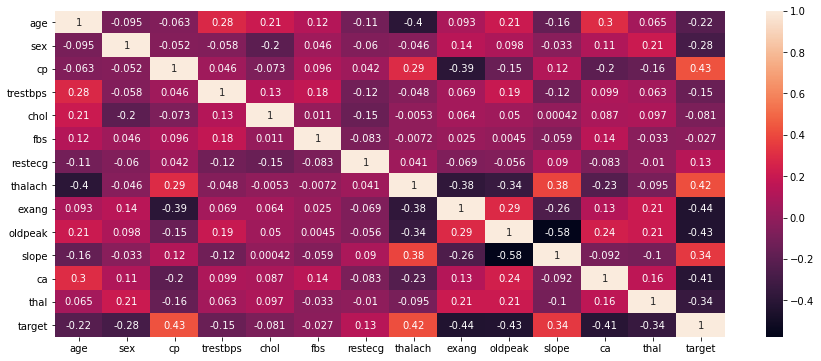

In [14]:
# Heatmap shows relationships and changes
plt.figure(figsize=(15,6))
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True)

In [15]:
data['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

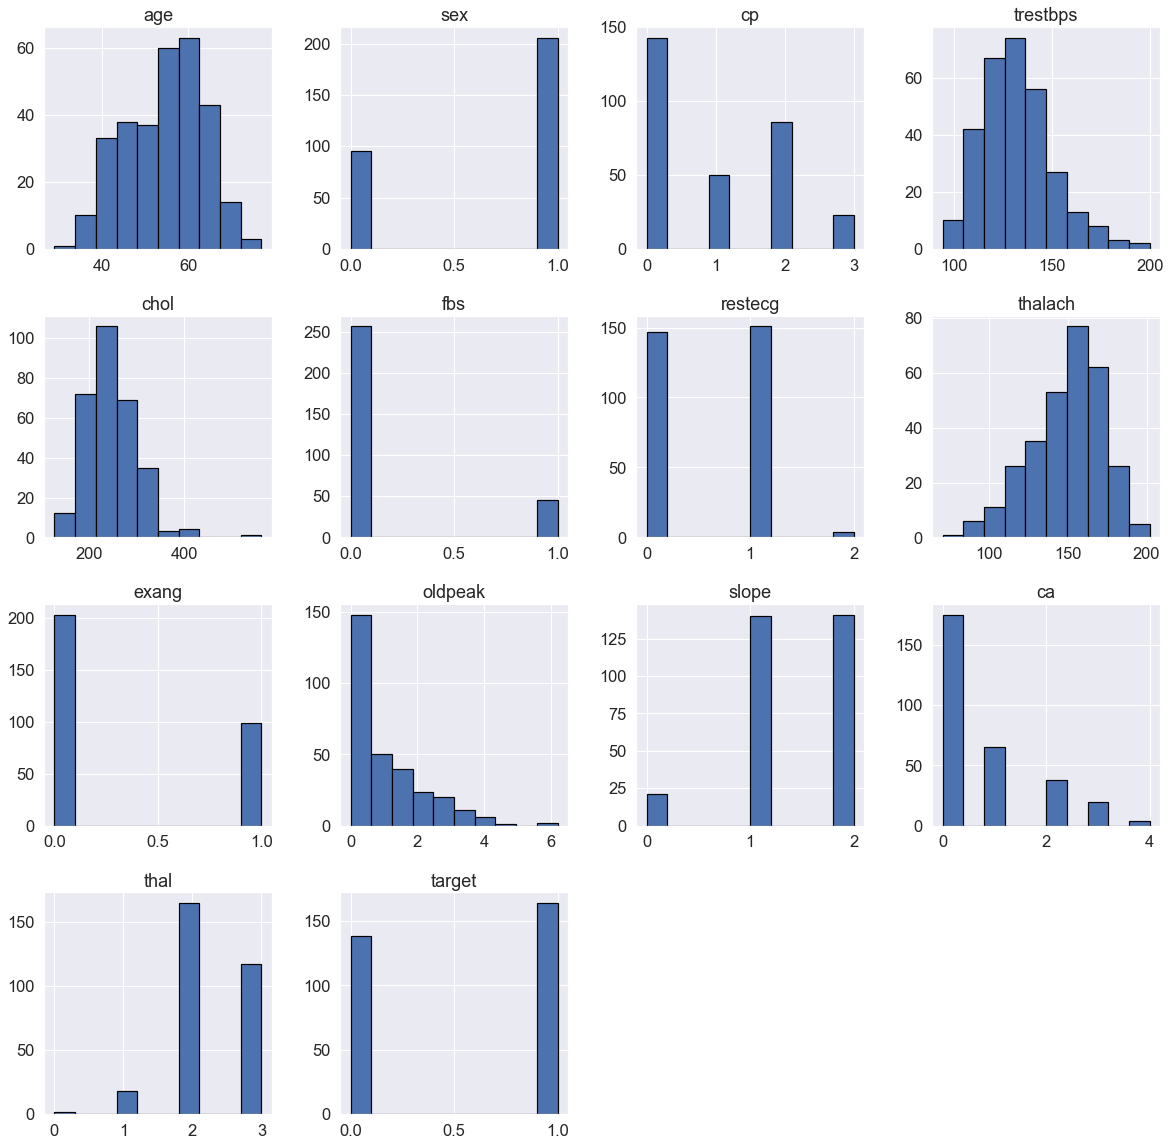

In [16]:
sns.set(font_scale=1.5)
data.hist(edgecolor='black', linewidth=1.2, figsize=(20,20));

## Count plot of Heart Disease

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


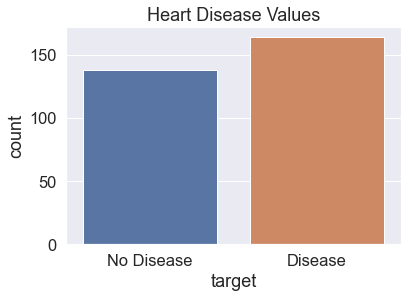

In [17]:
sns.countplot(data['target'])
plt.title("Heart Disease Values")
plt.xticks([0,1],['No Disease','Disease'])
plt.show()

<AxesSubplot:xlabel='sex', ylabel='count'>

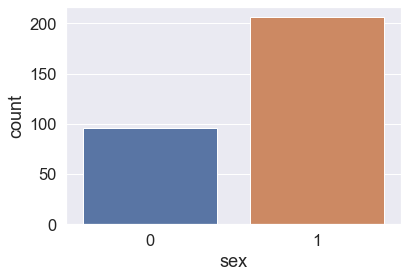

In [18]:
#Count plot of sex
sns.countplot(x='sex', data=data) 

In [19]:
data['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

## Distribution of Gender According to Heart Disease

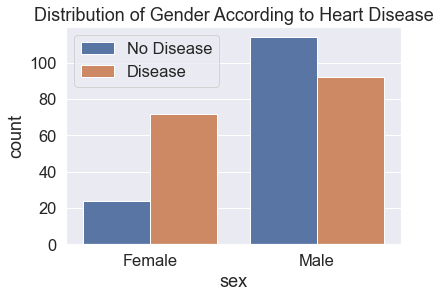

In [20]:
sns.countplot(x="sex",hue="target",data=data)
plt.title("Distribution of Gender According to Heart Disease")
plt.xticks([1,0],['Male','Female'])
plt.legend(labels=['No Disease','Disease'])
plt.show()

In [21]:
data.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          92
Name: target, dtype: int64

### Chest Pain type Countplot

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


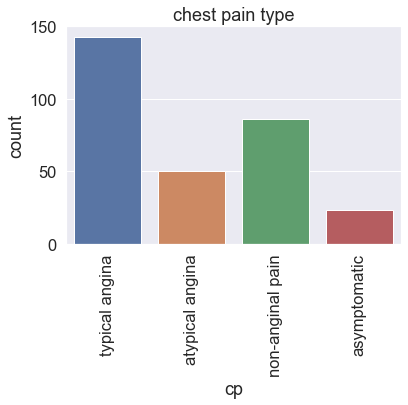

In [22]:
sns.countplot(data['cp'])
plt.title("chest pain type")
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asymptomatic'],rotation= 'vertical')
plt.show()

###  Distribution Of Chest Pain According To Heart Disease

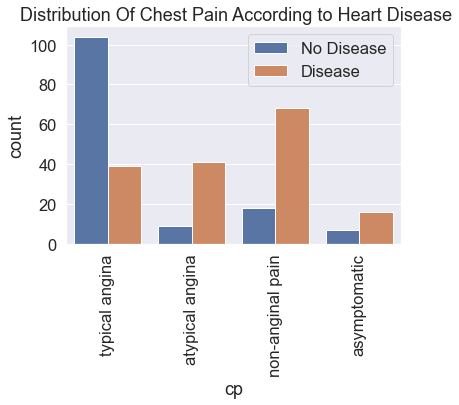

In [23]:
sns.countplot(x="cp",hue="target",data=data)
plt.title(" Distribution Of Chest Pain According to Heart Disease")
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asymptomatic'], rotation = 'vertical')
plt.legend(labels=['No Disease','Disease'])
plt.show()

### Age Distribution According to Heart Disease

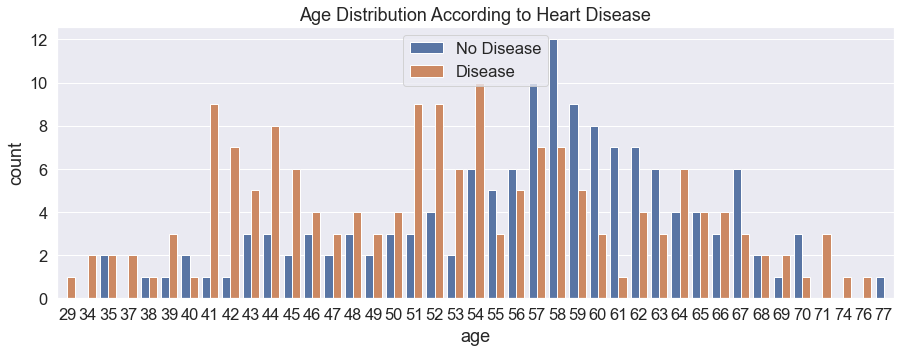

In [24]:
plt.figure(figsize = (15,5))
sns.countplot(x="age",hue="target",data=data)
plt.title("Age Distribution According to Heart Disease")
plt.legend(labels=['No Disease','Disease'])
plt.show()

### Fasting Blood Sugar Distribution According to Heart Disease

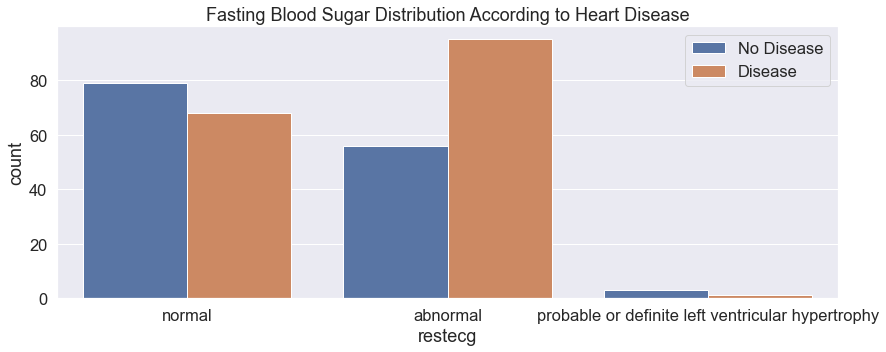

In [50]:
plt.figure(figsize = (14,5))
sns.countplot(x="restecg",hue="target",data=data)
plt.title("Fasting Blood Sugar Distribution According to Heart Disease")
plt.xticks([0,1,2],['normal','abnormal','probable or definite left ventricular hypertrophy'])
plt.legend(labels=['No Disease','Disease'])

plt.show()

### Fasting Blood Sugar Distribution According to Heart Disease

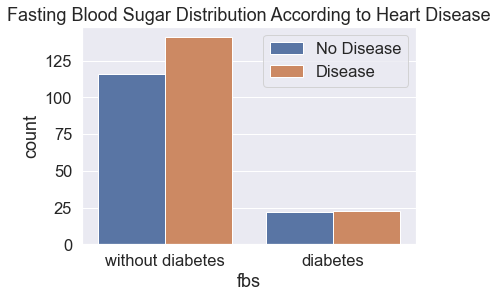

In [26]:
sns.countplot(x="fbs",hue="target",data=data)
plt.title("Fasting Blood Sugar Distribution According to Heart Disease")
plt.xticks([0,1],['without diabetes','diabetes'])
plt.legend(labels=['No Disease','Disease'])
plt.show()

## Model Building

In [27]:

from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
dataset = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])# creating dummy variable
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] # we have taken these columns for scale down
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [28]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.267966,-0.376556,-0.667728,0.806035,-0.037124,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.157260,0.478910,-0.841918,0.237495,1.773958,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1.724733,0.764066,-1.403197,-1.074521,1.342748,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.728383,0.935159,-0.841918,0.499898,-0.899544,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,0.839089,0.364848,0.919336,-1.905464,0.739054,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [29]:
input_variables=dataset.drop(columns='target',axis=1)
target_variable=dataset['target']

In [30]:
input_variables

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.267966,-0.376556,-0.667728,0.806035,-0.037124,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.157260,0.478910,-0.841918,0.237495,1.773958,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1.724733,0.764066,-1.403197,-1.074521,1.342748,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0.728383,0.935159,-0.841918,0.499898,-0.899544,0,1,1,0,0,...,1,0,1,0,0,0,0,0,0,1
4,0.839089,0.364848,0.919336,-1.905464,0.739054,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,-0.661712,-0.687083,-1.511859,0.394086,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
733,-1.153610,-1.346085,-2.041893,1.112172,-0.382092,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
739,-0.267966,-0.205463,0.164513,0.499898,-0.899544,0,1,1,0,0,...,1,0,1,0,0,0,0,0,0,1
843,0.506972,1.619532,0.512893,-1.074521,-0.899544,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0


In [31]:
target_variable

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [32]:
# Splitting data into train test 


X_train,X_test,Y_train,Y_test=train_test_split(input_variables,target_variable,test_size=0.2,random_state=40)

In [33]:
print(input_variables.shape,X_train.shape,X_test.shape)

(302, 30) (241, 30) (61, 30)


### APPLYING LOGISTIC REGRESSION 

In [34]:
reg=LogisticRegression()
reg.fit(X_train,Y_train)


LogisticRegression()

### Confusion Matrix

<AxesSubplot:>

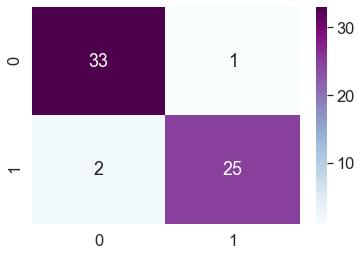

In [35]:

Predict_1=reg.predict(X_test) # Predict_1 = Predicted results
                              # Y_test= Actual results


cm=confusion_matrix(Y_test,Predict_1)
sns.heatmap(cm, annot=True,cmap='BuPu')

The result of confusion matrix shows very good results it can be interpreted as there are 33 people that have no heart disease and are predicted true as no heart disease called as True positive and only one in predicted as wrong or false positive whereas there are 25 people who have heart disease and are predicted as true or called as true negative and only 2 are predicted as false negative

In [36]:
train_da_accuracy=accuracy_score(Y_test,Predict_1)
print("Accuracy On Train Data : ",train_da_accuracy)

Accuracy On Train Data :  0.9508196721311475


## Classification Report

In [37]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Predict_1))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        34
           1       0.96      0.93      0.94        27

    accuracy                           0.95        61
   macro avg       0.95      0.95      0.95        61
weighted avg       0.95      0.95      0.95        61



## GradientBoostingClassifier MODEL

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, Y_train)

GradientBoostingClassifier()

In [39]:
# Accuracy of gradient boosting
y_pred_adb = gbc_clf.predict(X_test)
bost=accuracy_score(Y_test,y_pred_adb)
bost

0.8524590163934426

## GaussianNB MODEL

In [40]:
from sklearn.naive_bayes import GaussianNB
#NB
NB = GaussianNB()
model5 = NB.fit(X_train, Y_train)
prediction5 = model5.predict(X_test)
cm5= confusion_matrix(Y_test, prediction5)
cm5

array([[32,  2],
       [ 5, 22]], dtype=int64)

In [41]:
# Accuracy of model
gauss=accuracy_score(Y_test, prediction5)
gauss

0.8852459016393442

## KFold MODEL

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

svm=SVC()
model4=svm.fit(X_train,Y_train)
prediction4=model4.predict(X_test)
cm4= confusion_matrix(Y_test,prediction4)
cm4

array([[29,  5],
       [ 3, 24]], dtype=int64)

In [43]:
#accuracy
kfold=accuracy_score(Y_test, prediction4)
kfold

0.8688524590163934

## RANDOM FOREST MODEL

In [44]:
from sklearn.ensemble import RandomForestClassifier
#RandomForest
rfc=RandomForestClassifier()
model_2 = rfc.fit(X_train, Y_train)
prediction_2 = model_2.predict(X_test)
confusion_matrix(Y_test, prediction_2)

array([[32,  2],
       [ 3, 24]], dtype=int64)

In [45]:
rand=accuracy_score(Y_test, prediction_2)
rand

0.9180327868852459

In [46]:
# Classification report

print(classification_report(Y_test, prediction_2))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        34
           1       0.92      0.89      0.91        27

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



##  ACCURACY OF ALL  MODELS IS SUMMARIZED AS:

In [47]:

print ("LOGISTIC MODEL","{:.0%}".format(train_da_accuracy))
print("RANDOM FOREST MODEL","{:.0%}".format(rand))
print("KFold MODEL","{:.0%}".format(kfold))
print("GaussianNB MODEL","{:.0%}".format(gauss))
print("GradientBoostingClassifier MODEL","{:.0%}".format(bost))

LOGISTIC MODEL 95%
RANDOM FOREST MODEL 92%
KFold MODEL 87%
GaussianNB MODEL 89%
GradientBoostingClassifier MODEL 85%


Logistic model gives highest accuracy among all , hence it is the best one 